In [26]:
# Importeren van de benodigde libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [27]:
# Stap 1: Dataset laden
# Zorg ervoor dat je het juiste pad naar je CSV-bestand opgeeft
data = pd.read_csv('cleaned_data.csv', sep=';')

In [28]:
# Stap 2: Data voorbereiden
# Voorbeeld van het splitsen van features en labels
X = data.drop(['HeartDisease', 'CaseNumber', 'LastName', 'PostCode'], axis=1)
y = data['HeartDisease']  # Doelvariabele

# Converteer categorische kolommen naar numeriek (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

In [29]:
# Stap 3: Train-test splitsing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Stap 4: Random Forest Classifier aanmaken en trainen
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Stap 5: Voorspellingen maken
y_pred = rf_classifier.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.87        79
           1       0.88      0.94      0.91       104

    accuracy                           0.90       183
   macro avg       0.90      0.89      0.89       183
weighted avg       0.90      0.90      0.90       183

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           66           13
Actual 1            6           98
ROC AUC Score: 0.95
Willekeurige Sample van 20 Rijen voor het Eerste Model:
     Actual  Predicted  Predicted Probability
72        0          0                   0.06
218       0          0                   0.10
731       0          1                   0.68
660       1          1                   0.52
518       1          1                   0.89
39        1          1                   0.89
70        0          0                   0.08
755       1          1                   1.00
559       1          1               

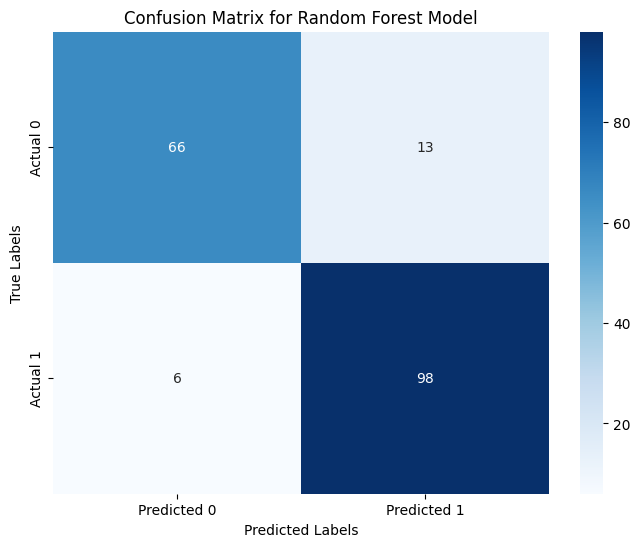

In [38]:
# Stap 6: Model evalueren
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Bereken de confusion matrix
cm_best = confusion_matrix(y_test, y_pred)

# Zet de confusion matrix om in een DataFrame
cm_df_best = pd.DataFrame(cm_best, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix
print("Confusion Matrix:")
print(cm_df_best)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')

# Resultaten DataFrame voor het eerste model
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Voorspelde waarschijnlijkheden
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_proba
})

# Selecteer een willekeurige sample van 20 rijen
random_sample = results_df.sample(n=10, random_state=42)

# Print de willekeurige sample
print("Willekeurige Sample van 10 Rijen voor het Eerste Model:")
print(random_sample)

# Visualiseer de confusion matrix met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [33]:
# Stap 7: Hypertuning met GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=5, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Beste model en hyperparameters
best_rf_model = grid_search.best_estimator_
print("Beste Hyperparameters:", grid_search.best_params_)

Beste Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


Classification Report voor het Beste Model:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        79
           1       0.87      0.92      0.90       104

    accuracy                           0.88       183
   macro avg       0.88      0.87      0.88       183
weighted avg       0.88      0.88      0.88       183

Confusion Matrix voor het Beste Model:
          Predicted 0  Predicted 1
Actual 0           65           14
Actual 1            8           96
ROC AUC Score voor het Beste Model: 0.95
Willekeurige Sample van 20 Rijen voor het Beste Model:
     Actual  Predicted  Predicted Probability
72        0          0               0.029557
218       0          0               0.090292
731       0          1               0.604888
660       1          1               0.558187
518       1          1               0.838208
39        1          1               0.908175
70        0          0               0.087482
755       1          

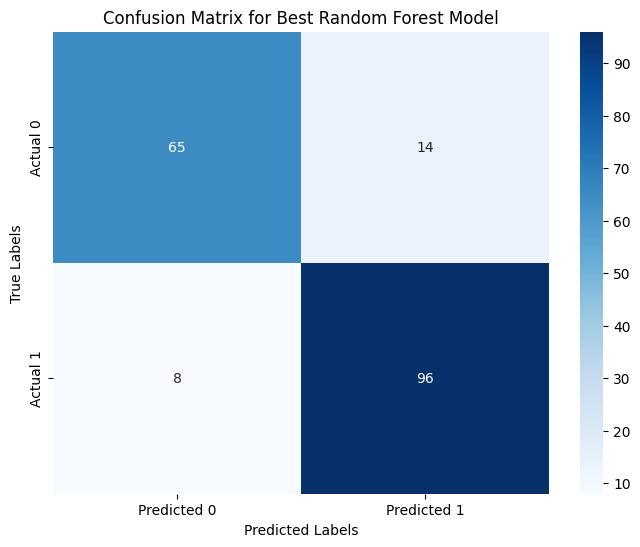

In [36]:
# Stap 8: Evalueren van het beste model
y_pred_best = best_rf_model.predict(X_test)

# Voorspelde waarschijnlijkheden
y_pred_proba_best = best_rf_model.predict_proba(X_test)[:, 1]

# Classificatie rapport
print("Classification Report voor het Beste Model:")
print(classification_report(y_test, y_pred_best))

# Bereken de confusion matrix voor het beste model
cm_best = confusion_matrix(y_test, y_pred_best)

# Zet de confusion matrix om in een DataFrame
cm_df_best = pd.DataFrame(cm_best, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix voor het beste model
print("Confusion Matrix voor het Beste Model:")
print(cm_df_best)

# ROC AUC Score voor het beste model
roc_auc_best = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score voor het Beste Model: {roc_auc_best:.2f}')

# Resultaten DataFrame voor het beste model
results_df_best = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best,
    'Predicted Probability': y_pred_proba_best
})

# Selecteer een willekeurige sample van 20 rijen
random_sample_best = results_df_best.sample(n=20, random_state=42)

# Print de willekeurige sample
print("Willekeurige Sample van 20 Rijen voor het Beste Model:")
print(random_sample_best)

# Visualiseer de confusion matrix voor het beste model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()